# Logistic Regressiion from Scratch

### Review: Linear Regression from Scratch

Note: This is the fundamental of deep learning.  Almost all deep learning operations is based on this weight multiplication.

Solving linear regression is an **optimization** problem. Optimization means finding the optimal - max, min.

$$\theta^* = \argmin_\theta J(\theta)$$

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = \mathbf{X} \cdot \theta$$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)})^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)})\mathbf{x}_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)
    

### Let's come back to Logistic Regression

Note: this is also the fundamental of all deep learning, that involves classification.   In deep learning, all operations do something like this....

Logistic Regression is a **classification** algorithm based on linear regression.

Classification - supervised learning - where $y$ is discrete.

Binary - class 0 and 1
Multiclass - > 2 class

Today we will be doing binary.....
This Thurs we will be doing multiclass....

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

    We know that $\texttt{range}(X \cdot \theta) =  (-\infty, \infty)$

    We need to find a function $g(x)$ such that it maps infinity to 0 and 1.

    That $g(x) = \displaystyle\frac{1}{1 + e^{-x}}$

    So if you combine $g(x)$ with $h(\theta)$, then you will get
    
    $h(g(x)) = \displaystyle\frac{1}{1 + e^{-(X \cdot \theta)}}$


2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        Note: 
        - the behavior of J is that when y, yhat= (1,1) | (0, 0) , then J = 0
        - the behavior of J is that when y, yhat= (0,1) | (1, 0) , then J = very high


    $$J(\theta) = \sum_{i=0}^m -( \mathbf{y}^{(i)} * \log{\mathbf{h}}^{(i)} + (1 - \mathbf{y}^{(i)})\log(1 - {\mathbf{h}}^{(i)}))$$
             

    2.2 $$\frac{\partial J}{\partial \theta_j} = \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Let's code

Text(0, 0.5, 'y')

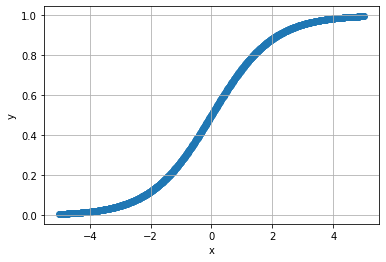

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#1. I want you to define this function g(x)
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    
#2. I want you to simulate x from - 5 to 5
x = np.linspace(-5,5,1000)
y = sigmoid(x)
#3. Try to plot it
plt.scatter(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

In [34]:
#1. define X with two samples. Sample 1 has egg price = 5, oil price = 10; Sample 2 has egg price = 3, oil price = 4; 
X = np.array([[5,10],[3,4],[9,10]])

#2. define any theta you like
theta = np.random.random((2,)) #np.ones((X.shape[1],))

#3. perform X dot theta #(3,2) @ (2,) = (3,)
def h(X,theta):
    return X @ theta
y_hat = h(X, theta)

#4. perform sigmoid in top and see whether the value is really 0 and 1
def sigmoid(x):
    return 1/(1 + np.exp(-x))

y_hat_sigmoid = sigmoid(y_hat)
#5. perform a round the nearest
print(np.round(y_hat_sigmoid))

[1. 1. 1.]


$$J(\theta) = \sum_{i=0}^m -(y^{(i)}*\log h^{(i)}+ (1-y^{(i)})*(1-\log{h}^{(i)}))$$

Good 0.31844724673955827
Bad 19.84779709959251


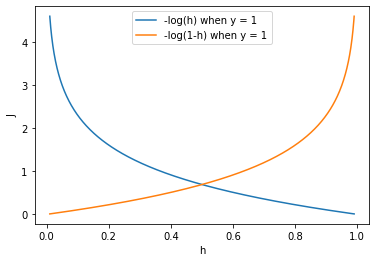

In [52]:
#1. Please code this loss function above
#h = f(x) = yhat
def binary_cross_entopy(y, yhat):
    return -np.sum(y*np.log(yhat)+(1-y)*(np.log(1-yhat)))
#1.1 Please plot -np.log(h) and -np.log(1-h), 
#where h is a value between 0.01 to 0.99
h = np.linspace(0.01,0.99,1000)
plt.plot(h,-np.log(h),label = '-log(h) when y = 1')
plt.plot(h,-np.log(1-h),label = '-log(1-h) when y = 1')
plt.xlabel('h')
plt.ylabel('J')
plt.legend()
#2.1 Simulate the actual y
y = np.array([0,1,1,0,1])
#2.2 simulate the very bad yhat - no good predictions
bad_yhat = np.array([0.88, 0.01, 0.02,0.99,0.01]) #opposite of good
#2.3 simulate a very good yhat - very good predictions
good_yhat = np.array([0.01,0.98,0.92,0.03,0.84])
#3. try to get j(\theta) of actual y vs. (1) very bad (2) very good
print('Good',binary_cross_entopy(y,good_yhat))
print('Bad',binary_cross_entopy(y,bad_yhat))

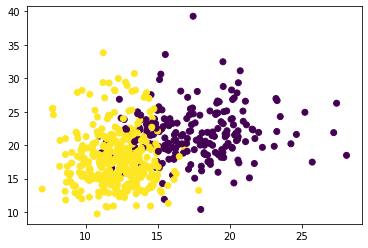

In [118]:
#1. Load breast cancer from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
#2. Set the X and y. split properly ,standardize properly
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=999)
#standardize properly
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = np.insert(X_train,0,1,axis=1) 
X_test = np.insert(X_test,0,1,axis=1)

#2.1 plot
plt.scatter(X[:,0],X[:,1],c=y)
#3.create a class of Logistic Regression (no need mini-batch, sto, or cross validation)
class LogisticRegression(object):
    def __init__(self,alpha=0.01,num_epochs=5):
        self.alpha = alpha
        self.num_epochs = num_epochs

    def fit(self,X_train,y_train):
        self.theta = np.ones(X_train.shape[1],) #<---- This is NOT good
        for epoch in range(self.num_epochs):
            #randomize out X_train
            perm = np.random.permutation(X_train.shape[0])
            X_train = X_train[perm]
            y_train = y_train[perm]
            self._train(X_train, y_train)

    def _train(self, X, y):
        #predict
        y_hat = self._predict(X)
        #grad
        deriv = self._gradient(X, y_hat - y)
        # print("Grad",deriv)
        #update
        self.theta = self.theta - self.alpha*deriv
        # print("Theta",self.theta)

    def _gradient(self, X,error):
        return X.T @ error  

    def predict(self, X): #fx, h_theta 
        return self.sigmoid(X @ self.theta)

    def _predict(self, X): #return either 0 or 1
        return np.round(self.sigmoid(X @ self.theta))

    def sigmoid(self, h):
        return 1/(1 + np.exp(-h))

    def binary_cross_entopy(self,y,yhat):
        return -np.sum(y*np.log(yhat)+(1-y)*(np.log(1-yhat)))

    def _coef(self): 
        return self.theta[1:]   

    def _bias(self):
        return self.theta[0] 

#4. fit, and predict
#Later.... 5. I will trach recall, precisionm accuracy

In [119]:
from sklearn.metrics import classification_report, accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)

yhat = lr._predict(X_test)
yhat.min(), yhat.max()
#it only takes either 0 or 1

(0.0, 1.0)

In [120]:
accuracy_score(y_test,yhat)

0.9532163742690059

In [122]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.95      0.97      0.96        98

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Confusion Matrix

In [ ]:
'''
Confusion Matrix
                        Actual
                1                 0
        1   #True pos       #False pos
Predict
        0   #False neg      #True neg
'''

# TP + FP + FN + TN = m

# Accuracy = (TP + FP)/(TP + FP + FN + TN)

#but accuracy sucks, the class is imbalanced
#remember the imbalance case we got
#the model will always get 10/11 accuracy

#recall = TP/(TP + FN) #penalize FN, it does not like FN, ex. Cancer, Terrorist, Zombie

#precision = TP/(TP+FP) #penalizee FP, it does not like FP, ex. Search Engine

#f1 = 2 * recall * precision / (precision + recall) #balance between recall and precision

#btw, recall, precisionm, f1 are quite tobut with imbalanced data

In [165]:
#please code the following FROM scratch
def cm(yhat,y):
    TP = TN = FP = FN = 0
    for i in range(yhat.shape[0]):
        if (yhat[i] == 1) & (y[i] == 1):
            TP += 1
        elif (yhat[i] == 0) & (y[i] == 0):
            TN += 1
        elif (yhat[i] == 1) & (y[i] == 0):
            FP += 1
        elif (yhat[i] == 0) & (y[i] == 1):
            FN += 1
    print('Added everything :',TP + FP + FN + TN)
    print('yhat samples :',yhat.shape[0])
    assert (TP + FP + FN + TN) == yhat.shape[0]
    return TP,FP,FN,TN

TP,FP,FN,TN = cm(yhat,y_test)

Added everything : 171
yhat samples : 171


In [169]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#ACCURACY
accuracy = (TP + TN) /(TP + FP + FN + TN)
#RECALL
recall = TP/(TP + FN)
#PRECISION
precision = TP/(TP+FP)
#F1
f1 = 2 * recall * precision / (precision + recall)

print(accuracy,recall,precision,f1)
print(accuracy_score(y_test,yhat),recall_score(y_test,yhat),precision_score(y_test,yhat),f1_score(y_test,yhat))


0.9532163742690059 0.9693877551020408 0.95 0.9595959595959594
0.9532163742690059 0.9693877551020408 0.95 0.9595959595959594
